# Análisis de variables macroeconómicas

In [266]:
# Importar paquetes requeridos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
plt.close('all')

# Configuración de los gráficos ('True' para alta resolución)
calidad_publicacion = False

if calidad_publicacion:
    matplotlib.rcParams['figure.dpi']= 300
else:
    matplotlib.rcParams['figure.dpi']= 60

%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-talk')

## El producto interno bruto

El primer análisis es el del producto interno bruto. Para ello empleamos la serie `pib_trimestral`, que contiene observaciones trimestrales del producto interno bruto a precios constantes (2013):

In [267]:
# Cargar base de datos del PIB
pib_trimestral = pd.read_excel('pib.xlsx', engine = 'openpyxl')
pib_trimestral = pib_trimestral.set_index('periodo')
pib_trimestral.head()

,trimestre,pib,importaciones,consumo,gasto,inversion,exportaciones,discrepancia
periodo,,,,,,,,
1993,1,1.000889e+07,1458413.400,6094259.456,1410454.426,2311587.205,1421049.137,229957.838
1993,2,1.017104e+07,1574506.158,6304689.609,1428916.551,2199172.511,1477720.814,335042.080
1993,3,1.006626e+07,1558216.038,6243681.365,1376521.052,2214659.705,1465345.740,324266.582
1993,4,1.041610e+07,1717843.240,6598264.978,1423995.127,2355827.803,1588555.613,167295.950
1994,1,1.034339e+07,1729058.259,6258192.612,1453656.689,2665717.344,1576502.879,118377.226


La serie `pib_trimestral` contiene observaciones del PIB trimestral *anualizado* de México. Esto quiere decir que cada observación se debe dividir por 4 para obtener el PIB del trimestre. Por tanto, para obtener el PIB anual se debe calcular el promedio de los correspondientes valores trimestrales. Esta nueva serie se llama `pib_anual`:

In [268]:
# Agrupar por periodo y calcular la media:
pib_anual = pib_trimestral.copy()
pib_anual = pib_anual.groupby('periodo')
pib_anual = pib_anual.aggregate(np.mean)

# Eliminar la columna 'trimestre' que ya no es necesaria:
pib_anual.pop('trimestre')

pib_anual.head()

,pib,importaciones,consumo,gasto,inversion,exportaciones,discrepancia
periodo,,,,,,,
1993,1.016557e+07,1.577245e+06,6.310224e+06,1.409972e+06,2.270312e+06,1.488168e+06,264140.61250
1994,1.066786e+07,1.857120e+06,6.644794e+06,1.452318e+06,2.598265e+06,1.619055e+06,210548.39250
1995,9.996721e+06,1.561054e+06,6.254226e+06,1.436595e+06,1.785976e+06,1.946071e+06,134905.26825
1996,1.067382e+07,1.833894e+06,6.537721e+06,1.436303e+06,2.067390e+06,2.246699e+06,219606.00675
1997,1.140465e+07,2.257764e+06,7.026836e+06,1.505833e+06,2.358747e+06,2.457556e+06,313437.85300


Si el cálculo es correcto esperamos que se cumpla la identidad contable:

$$ Y = C + I + G + EX - IM + \epsilon$$

donde $Y$ es el PIB (del lado de la oferta), mientras que el lado de la demanda es la suma del consumo ($C$), la inversión ($I$), el gasto público ($G$), las exportaciones ($EX$), las importaciones ($IM$) y la llamada "discrepancia estadística" $\epsilon$. Verificamos que sea así:

In [269]:
pib_anual_2 = pib_anual.copy()

# Obtener la suma de los componentes del lado de la demanda:
pib_anual_2['suma'] = pib_anual_2['consumo'] + pib_anual_2['inversion'] + pib_anual_2['gasto'] + pib_anual_2['exportaciones'] - pib_anual_2['importaciones'] + pib_anual_2['discrepancia']

# Obtener la diferencia entre el PIB (oferta) y la demanda, que debe ser cero:
pib_anual_2['diferencia'] = round(pib_anual_2['pib'] - pib_anual_2['suma'])
pib_anual_2.loc[:, ['pib', 'suma', 'diferencia']]

# Diferencia máxima y mínima:
(max(pib_anual_2['diferencia']), min(pib_anual_2['diferencia']))

(0.0, 0.0)

Como las diferencias máxima y mínima son ambas cero, entonces todas las observaciones de la base de datos cumplen la identidad contable anterior. Por lo tanto el cálculo del PIB anual es correcto.

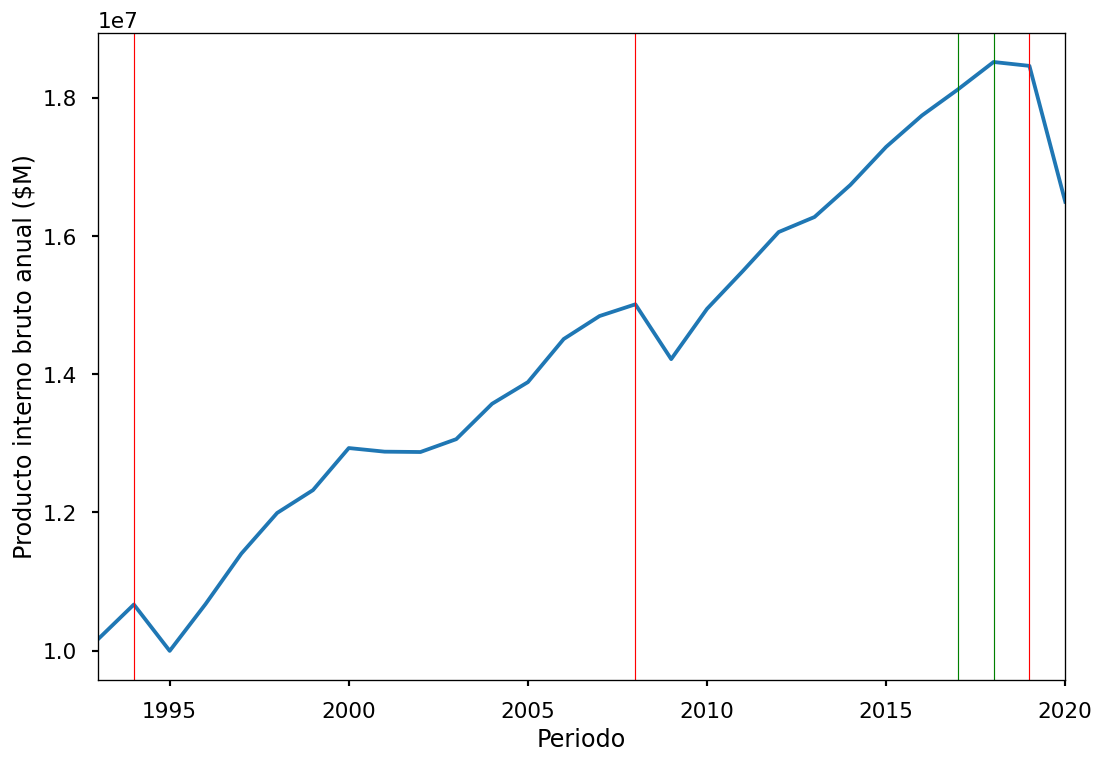

In [270]:
plt.plot(pib_anual['pib'])
plt.xlabel('Periodo')
plt.ylabel('Producto interno bruto anual ($M)')
plt.xlim(min(pib_anual.index),max(pib_anual.index))
plt.axvline(x = 1994, linewidth = '0.7', color = 'r') # 1994
plt.axvline(x = 2008, linewidth = '0.7', color = 'r') # 2008
plt.axvline(x = 2019, linewidth = '0.7', color = 'r') # 2019
plt.axvline(x = 2017, linewidth = '0.7', color = 'g') # Donald Trump (2017)
plt.axvline(x = 2018, linewidth = '0.7', color = 'g') # López Obrador (2018)

**Observaciones**:
* Hay tres caídas significativas del PIB anual, en los siguientes años: 1994 (crisis del tequila), 2008 (crisis financiera de EEUU) y 2019 (coronavirus).
* La magnitud de la recesión ocasionada por la pandemia del coronavirus es significativamente mayor que las otras dos.
* La recesión del coronavirus fue precedida por un periodo de crecimiento nulo (ligeramente negativo de hecho), que coincide con el inicio del gobierno actual (2018, segunda línea verde). Observamos que incluso después de la toma de posesión de Donald Trump (2017, primera línea verde), el país experimentó un crecimiento a la misma tasa media que los años anteriores.

En general, pensamos que el crecimiento del PIB guarda una correlación positiva con el crecimiento de la población. Por eso, para utilizar el PIB como una medida del crecimiento económico más objetiva es útil eliminar este efecto calculando el PIB per cápita (notamos que puede haber crecimiento de población y contracción del producto simultáneamente en el corto plazo).

Usaremos la serie `poblacion` que contiene información de la población de México registrada en los censos quinquenales:

(1910.0, 2015.0)

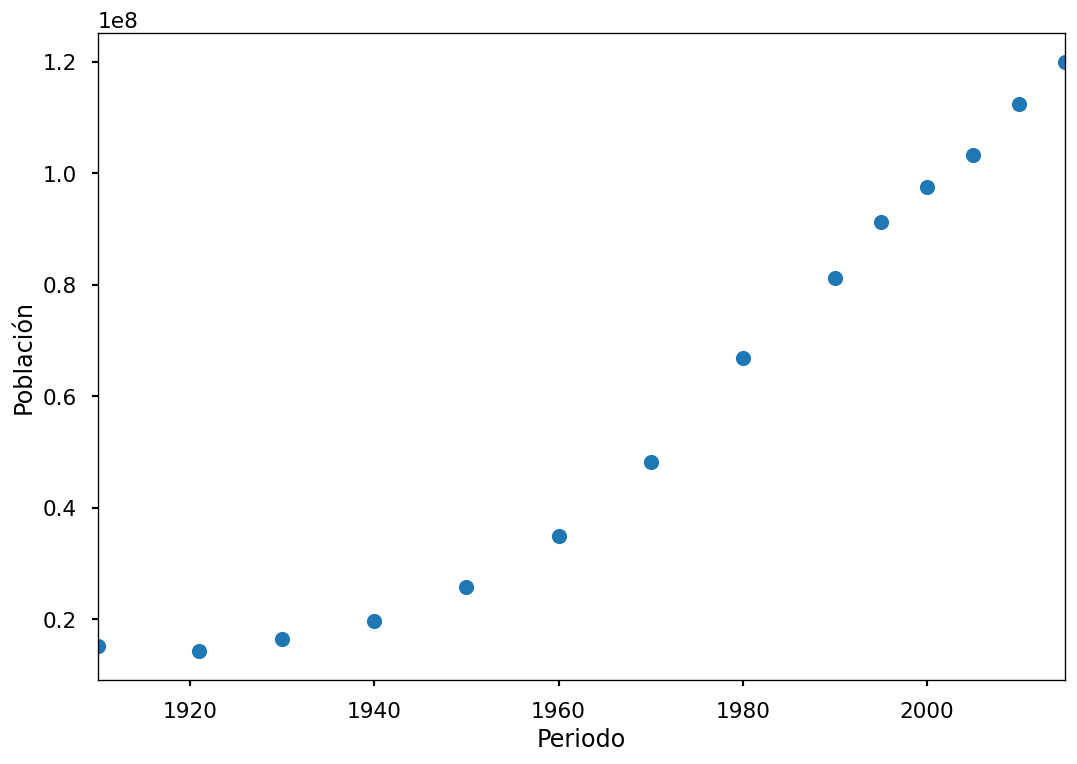

In [271]:
# Cargar base de datos de la población
poblacion = pd.read_excel('poblacion.xlsx', engine = 'openpyxl')
poblacion = poblacion.set_index('periodo')
plt.plot(poblacion['poblacion'], 'o')
plt.xlabel('Periodo')
plt.ylabel('Población')
plt.xlim(min(poblacion.index),max(poblacion.index))

Debido a que la información no es anual, es necesario estimar la población en los periodos intercensales. La forma más sencilla de hacerlo es mediante una estimación (interpolación) lineal entre los periodos censales. Dadas dos observaciones (en censos consecutivos) $p_t$ y $p_{t+k}$ de la población, la estimación para $p_r$ (donde $t \leq r \leq t+k$) estará dada por:

$$p_r = p_t + \frac{p_{t+k} - p_t}{k} (r-t)$$

In [272]:
# Límites para estimar la población
periodo_inicial = min(poblacion.index)
periodo_final = max(pib_anual.index)

estimados = dict()

# Algoritmo de estimación:
for periodo in range(periodo_inicial, periodo_final + 1):
    if periodo in poblacion.index:
        estimados[periodo] = poblacion.loc[periodo].poblacion
    else:
        obs_1 = periodo
        obs_2 = periodo
        if periodo > max(poblacion.index):
            obs_1 = max(poblacion.index[:-1])
            obs_2 = max(poblacion.index)
        else:
            while obs_1 not in poblacion.index:
                obs_1 = obs_1 -1
            while obs_2 not in poblacion.index:
                obs_2 = obs_2 + 1
        estimacion = poblacion.loc[obs_1].poblacion + (poblacion.loc[obs_2].poblacion - poblacion.loc[obs_1].poblacion) / (obs_2 - obs_1) * (periodo - obs_1)
        estimacion = int(estimacion)
        estimados[periodo] = estimacion

# Data frame final con las estimaciones:
poblacion_estimada = pd.DataFrame({'periodo': estimados.keys(), 'poblacion': estimados.values()})
poblacion_estimada = poblacion_estimada.set_index('periodo')

Verificamos que la estimación intercensal sea congruente con los datos

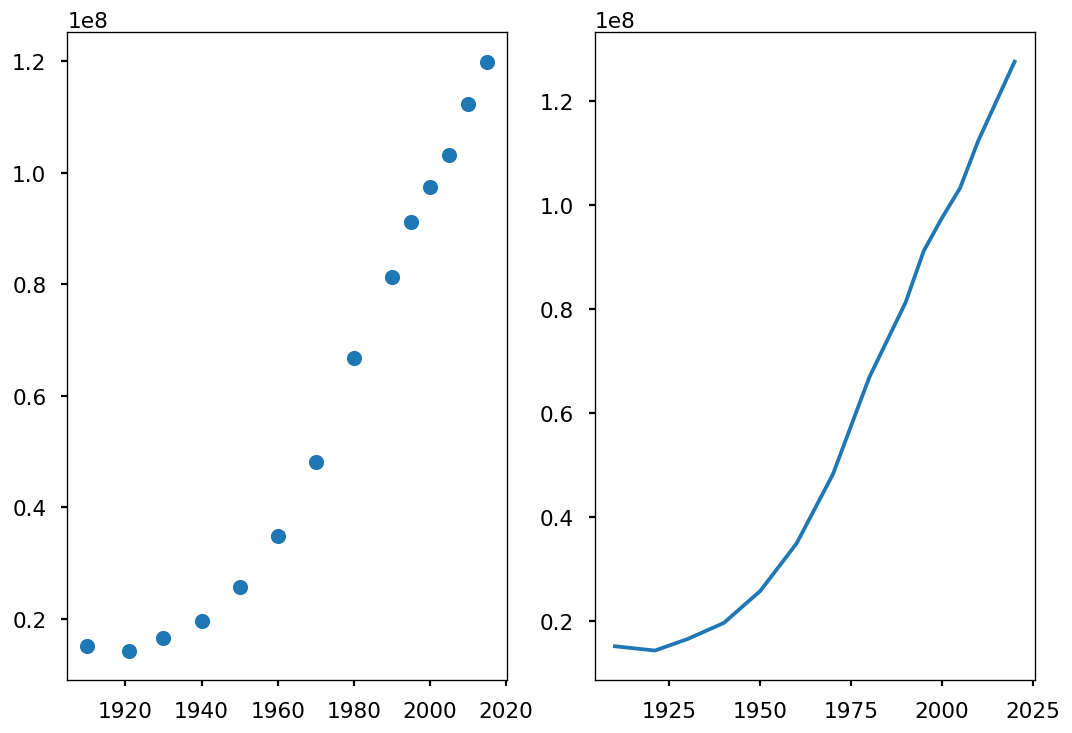

In [273]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(poblacion['poblacion'], 'o')
ax2.plot(poblacion_estimada['poblacion'])

Finalmente podemos calcular el PIB real per cápita:

In [274]:
# Unir los datos de población estimada a los del PIB anual
pib_anual = pd.merge(pib_anual, poblacion_estimada, how='inner', on='periodo')

# Calcular PIB anual per cápita y convertirlo de millones a miles:
pib_anual['per_capita'] = (pib_anual['pib'] / pib_anual['poblacion']) * 1000

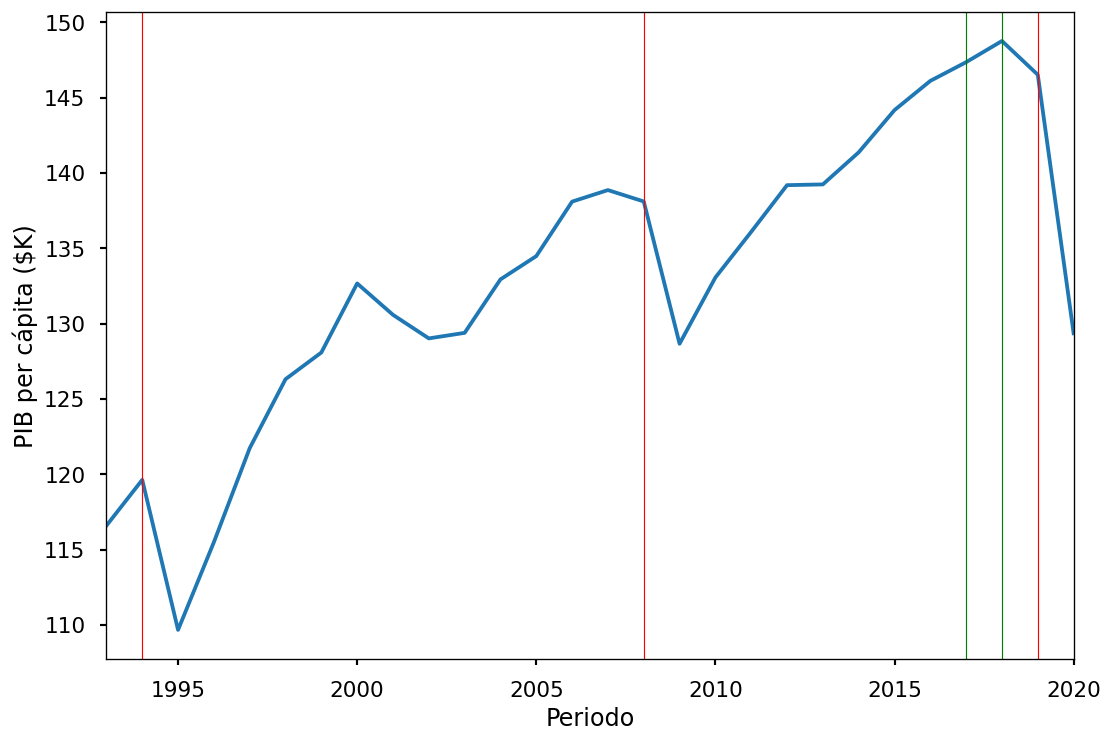

In [275]:
plt.plot(pib_anual['per_capita'])
plt.xlabel('Periodo')
plt.ylabel('PIB per cápita ($K)')
plt.xlim(min(pib_anual.index),max(pib_anual.index))
plt.axvline(x = 1994, linewidth = '0.7', color = 'r') # 1994
plt.axvline(x = 2008, linewidth = '0.7', color = 'r') # 2008
plt.axvline(x = 2019, linewidth = '0.7', color = 'r') # 2019
plt.axvline(x = 2017, linewidth = '0.7', color = 'g') # Donald Trump (2017)
plt.axvline(x = 2018, linewidth = '0.7', color = 'g') # López Obrador (2018)

Observamos que en este gráfico aparece una nueva ligera recesión en el año 2000, que corresponde al efecto conjunto de la crisis punto com y un aumento moderado en la tasa de natalidad.

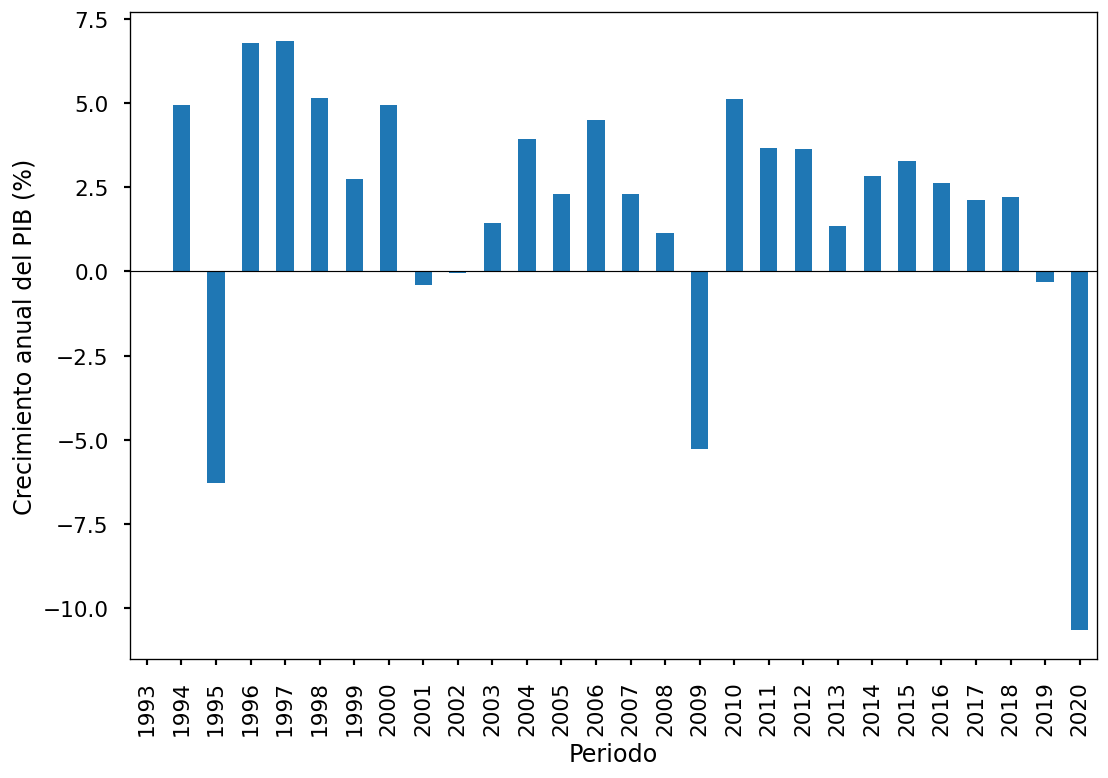

In [276]:
# Tasa de crecimiento del PIB anual:
pib_anual['pib_tasa'] = 100 * (pib_anual['pib'] - pib_anual['pib'].shift(1)) / pib_anual['pib'].shift(1)
pib_anual['pib_tasa'].plot.bar()
plt.xlabel('Periodo')
plt.ylabel('Crecimiento anual del PIB (%)')
plt.axhline(y = 0, linewidth = '0.7', color = 'k')

En esta gráfica podemos apreciar la magnitud de los decrecimientos: la crisis del coronavirus ha provocado un descenso del 10% anual en el PIB en 2020, prácticamente el doble que en las crisis anteriores.

Para un análisis más detallado, es útil considerar la descomposición del producto en sus respectivos componentes de demanda: consumo privado, gasto público, inversión (formación de capital fijo más variación de inventarios) y exportaciones netas (exportaciones menos importaciones).

In [277]:
# Tasa de crecimiento de los componentes del PIB trimestral, respecto al trimestre del año anterior:
pib_trimestral['pib_tasa'] = (pib_trimestral['pib'] - pib_trimestral['pib'].shift(4)) / pib_trimestral['pib'].shift(4)
pib_trimestral['importaciones_tasa'] = 100 * (pib_trimestral['importaciones'] - pib_trimestral['importaciones'].shift(1)) / pib_trimestral['importaciones'].shift(1)
pib_trimestral['consumo_tasa'] = 100 * (pib_trimestral['consumo'] - pib_trimestral['consumo'].shift(1)) / pib_trimestral['consumo'].shift(1)
pib_trimestral['gasto_tasa'] = 100 * (pib_trimestral['gasto'] - pib_trimestral['gasto'].shift(1)) / pib_trimestral['gasto'].shift(1)
pib_trimestral['inversion_tasa'] = 100 * (pib_trimestral['inversion'] - pib_trimestral['inversion'].shift(1)) / pib_trimestral['inversion'].shift(1)
pib_trimestral['exportaciones_tasa'] = 100 * (pib_trimestral['exportaciones'] - pib_trimestral['exportaciones'].shift(1)) / pib_trimestral['exportaciones'].shift(1)

# Datos del PIB trimestral en formato largo:
pib_trimestral_l = pib_trimestral.copy()
pib_trimestral_l = pib_trimestral_l.pivot(columns = 'trimestre',
                                          values = ['pib_tasa', 'importaciones_tasa', 'consumo_tasa', 'gasto_tasa' , 'inversion_tasa', 'exportaciones_tasa'])

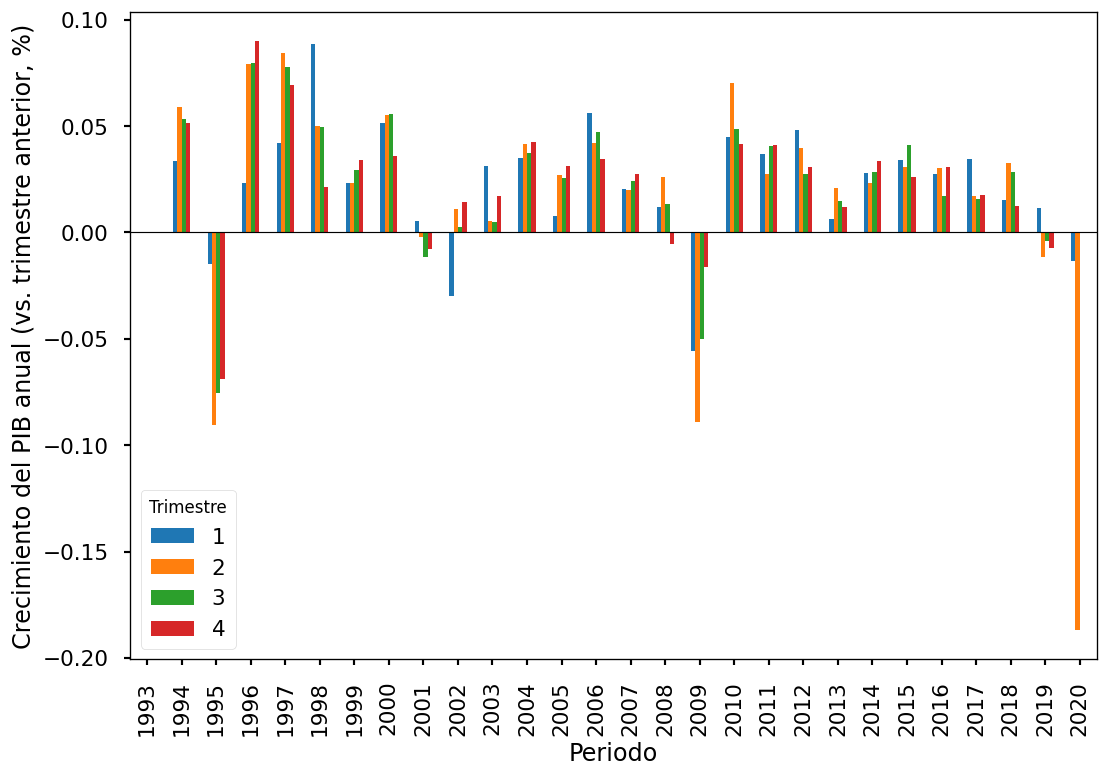

In [279]:
pib_trimestral_l['pib_tasa'].plot.bar()
plt.xlabel('Periodo')
plt.ylabel('Crecimiento del PIB anual (vs. trimestre anterior, %)')
plt.legend(title = 'Trimestre', loc = 0)
plt.axhline(y = 0, linewidth = '0.7', color = 'k')

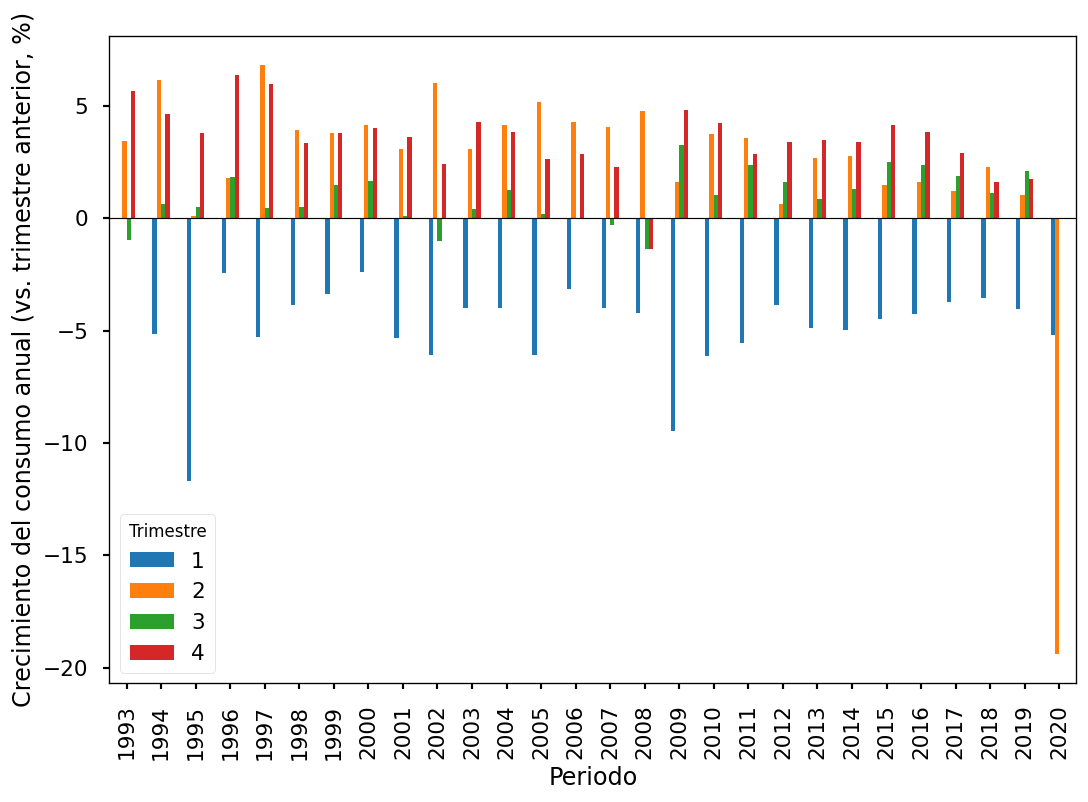

In [280]:
pib_trimestral_l['consumo_tasa'].plot.bar()
plt.xlabel('Periodo')
plt.ylabel('Crecimiento del consumo anual (vs. trimestre anterior, %)')
plt.legend(title = 'Trimestre', loc = 0)
plt.axhline(y = 0, linewidth = '0.7', color = 'k')

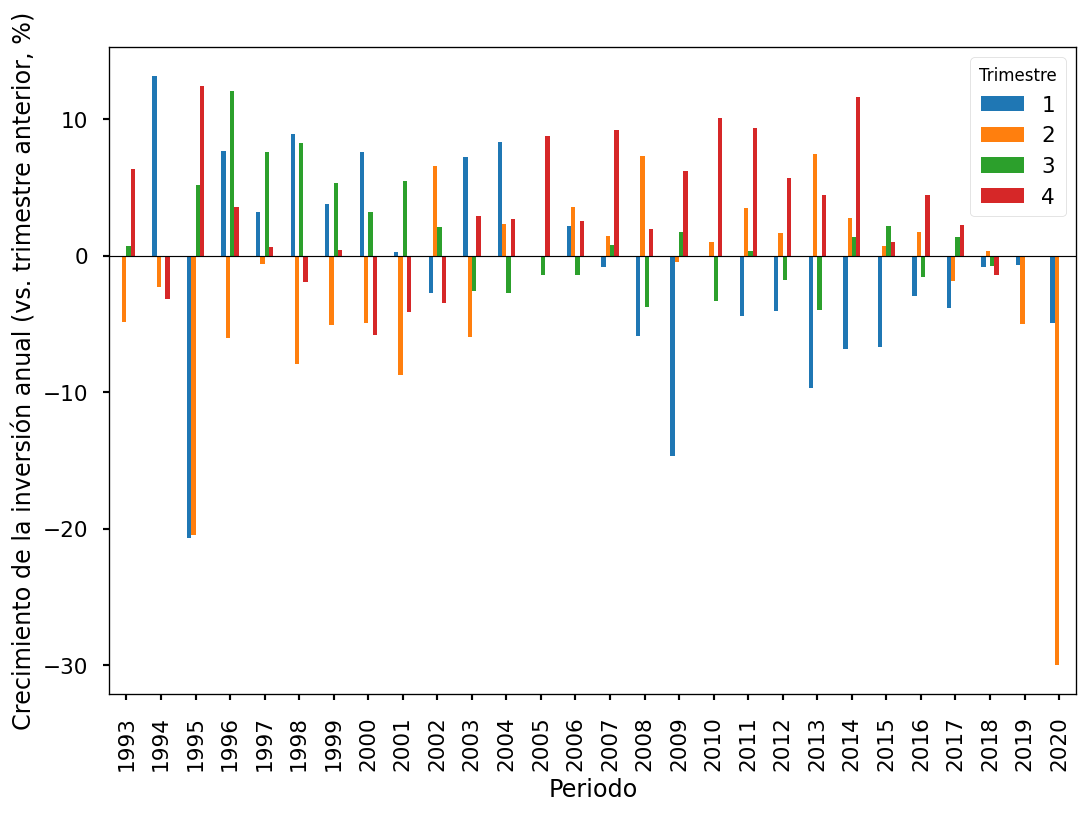

In [281]:
pib_trimestral_l['inversion_tasa'].plot.bar()
plt.xlabel('Periodo')
plt.ylabel('Crecimiento de la inversión anual (vs. trimestre anterior, %)')
plt.legend(title = 'Trimestre', loc = 0)
plt.axhline(y = 0, linewidth = '0.7', color = 'k')

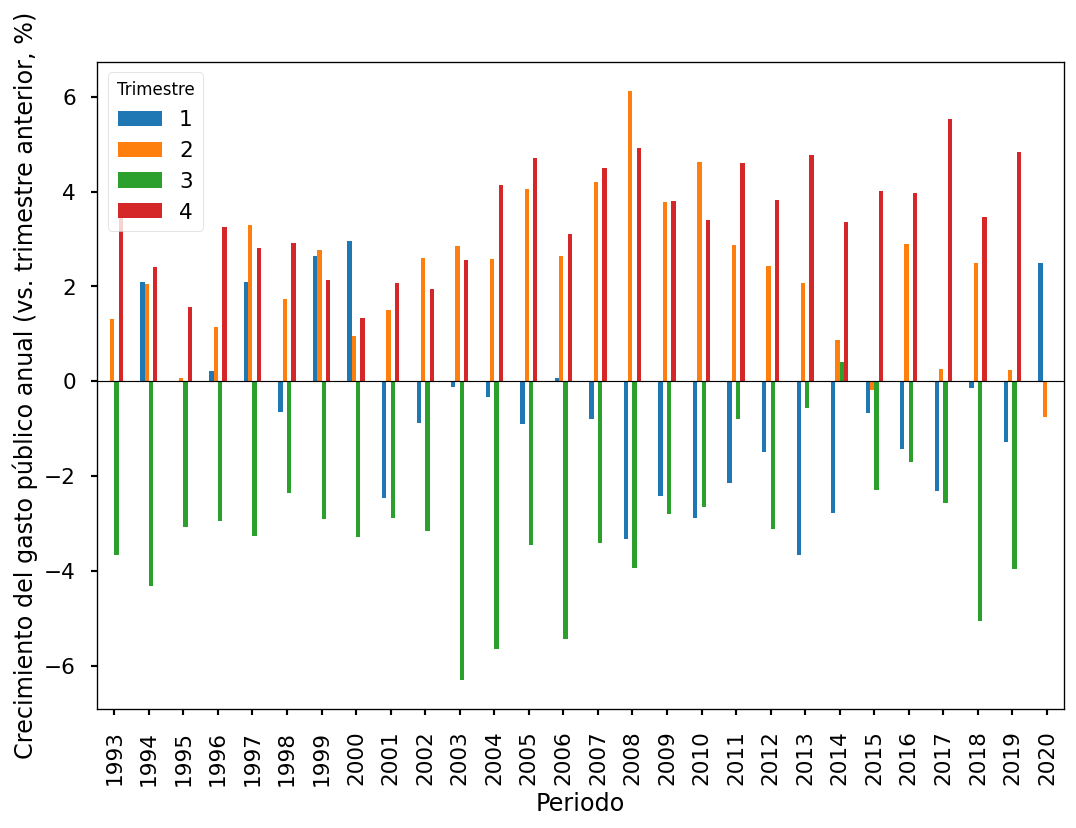

In [282]:
pib_trimestral_l['gasto_tasa'].plot.bar()
plt.xlabel('Periodo')
plt.ylabel('Crecimiento del gasto público anual (vs. trimestre anterior, %)')
plt.legend(title = 'Trimestre', loc = 0)
plt.axhline(y = 0, linewidth = '0.7', color = 'k')

In [283]:
# Cálculo de las tasas de crecimiento de los componentes del PIB anual:
pib_anual['importaciones_tasa'] = 100 * (pib_anual['importaciones'] - pib_anual['importaciones'].shift(1)) / pib_anual['importaciones'].shift(1)
pib_anual['consumo_tasa'] = 100 * (pib_anual['consumo'] - pib_anual['consumo'].shift(1)) / pib_anual['consumo'].shift(1)
pib_anual['gasto_tasa'] = 100 * (pib_anual['gasto'] - pib_anual['gasto'].shift(1)) / pib_anual['gasto'].shift(1)
pib_anual['inversion_tasa'] = 100 * (pib_anual['inversion'] - pib_anual['inversion'].shift(1)) / pib_anual['inversion'].shift(1)
pib_anual['exportaciones_tasa'] = 100 * (pib_anual['exportaciones'] - pib_anual['exportaciones'].shift(1)) / pib_anual['exportaciones'].shift(1)
pib_anual['poblacion_tasa'] = 100 * (pib_anual['poblacion'] - pib_anual['poblacion'].shift(1)) / pib_anual['poblacion'].shift(1)

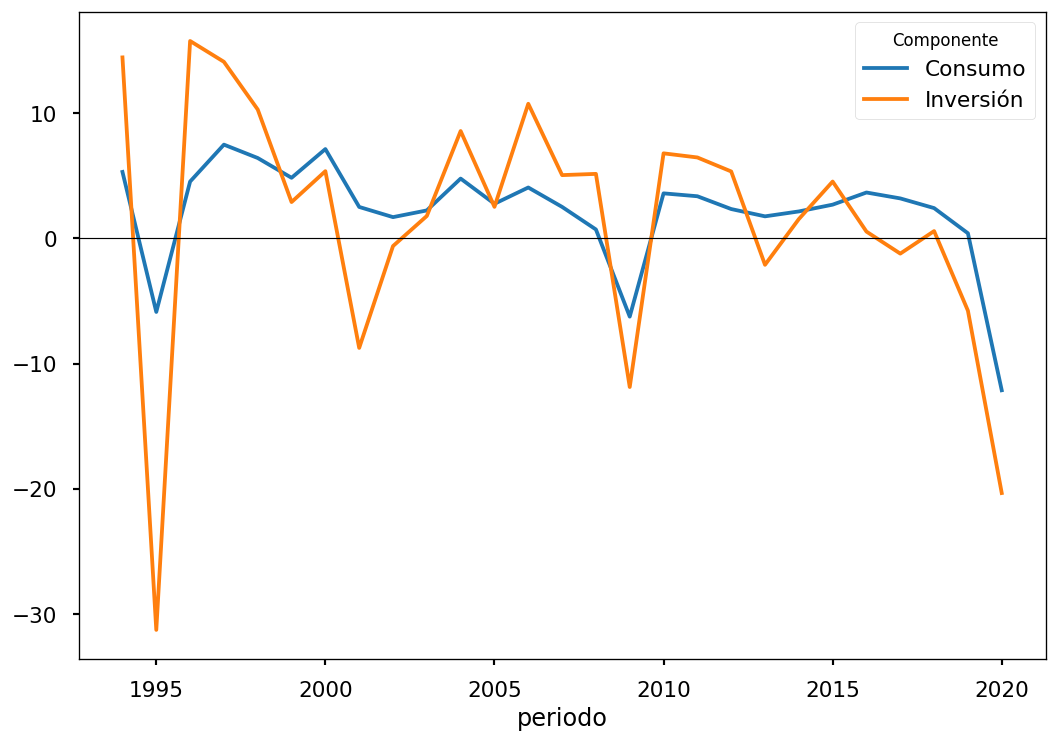

In [284]:
pib_anual[['consumo_tasa', 'inversion_tasa']].plot()
plt.legend(title = 'Componente', loc = 0, labels = ['Consumo', 'Inversión'])
plt.axhline(y = 0, linewidth = '0.7', color = 'k')